In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.animation as animation

# 2-Body Orbit

In [2]:
class orbits():
    def __init__(self,m1,m2,G):
        """
        G = gravitational constant
        m1 = mass of body 1
        m2 = mass of body 2
        
        """
        self.G=G
        self.m1 = m1
        self.m2 = m2
        
    def dy_dt(self,t,y):
        """
        
        """
        G=self.G
        m1=self.m1
        m2=self.m2
        x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = y
        denom = ((x1-x2)**2.+(y1-y2)**2.)
        
        
        x1ddot = (G*m2*(-x1+x2))/denom**(3./2.)
        x2ddot = (G*m1*(x1-x2))/denom**(3./2.)
        y1ddot = (G*m2*(-y1+y2))/denom**(3./2.)
        y2ddot = (G*m1*(y1-y2))/denom**(3./2.)
        
        
       
        

        return x1dot,x1ddot,y1dot,y1ddot,x2dot,x2ddot,y2dot,y2ddot
                                                                                            
    def solve_ode(self, t_pts, x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        self.y = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             self.y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = solution.y

        return x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot

    
    def solve_ode_Leapfrog(self, t_pts, x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        x1[0],x1dot[0],y1[0],y1dot[0],x2[0],x2dot[0],y2[0],y2dot[0] = x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0
        
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            y = [x1[i],x1dot[i],y1[i],y1dot[i],x2[i],x2dot[i],y2[i],y2dot[i]]
            
            x1_dot_half[i] = x1dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2dot[i] + self.dy_dt(t, y)[5] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1dot[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2dot[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            
            #update the coords
            y = [x1[i+1],x1dot[i],y1[i+1],y1dot[i],x2[i+1],x2dot[i],y2[i+1],y2dot[i]]
            
            x1dot[i+1] = x1_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x2dot[i+1] = x2_dot_half[i] + self.dy_dt(t, y)[5] * delta_t/2.
            y1dot[i+1] = y1_dot_half[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y2dot[i+1] = y2_dot_half[i] + self.dy_dt(t, y)[7] * delta_t/2.
            
            
                
        return x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot

    def energy(self, t_pts, x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot):
        """Evaluate the energy as a function of time"""
        m1 = self.m1
        m2 = self.m2
        G = self.G
            
        return (1/2)*m1*(x1dot**2+y1dot**2)+(1/2)*m2*(x2dot**2+y2dot**2)-G*m1*m2/np.sqrt((x2-x1)**2+(y2-y1)**2)
    


In [3]:
#establish inital 2-body parameters and initialize an orbit
m1 = 5.
m2 = 1.
G = 1.

myorbit = orbits(m1,m2,G)

#create t-pts array
t_start = 0.
t_end = 200.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

#2 body initial conditions
x1_0=0.
x1dot_0=-1.
y1_0=0.
y1dot_0=-1.
x2_0=1.
x2dot_0=-2.
y2_0=1.
y2dot_0=1.

#solve ode for 2-body and leapfrog method
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = myorbit.solve_ode(t_pts, x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0)
Lx1,Lx1dot,Ly1,Ly1dot,Lx2,Lx2dot,Ly2,Ly2dot = myorbit.solve_ode_Leapfrog(t_pts, x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0)

In [4]:
#calculate center of momentum then convert to that frame
Xcm = (m1*x1dot+m2*x2dot)/(m1+m2)
Ycm = (m1*y1dot+m2*y2dot)/(m1+m2)
x1com = x1-Xcm*t_pts
x2com = x2-Xcm*t_pts
y2com = y2-Ycm*t_pts
y1com = y1-Ycm*t_pts

#calculate center of momentum and convert for leapfrog method
LXcm = (m1*Lx1dot+m2*Lx2dot)/(m1+m2)
LYcm = (m1*Ly1dot+m2*Ly2dot)/(m1+m2)
Lx1com = Lx1-LXcm*t_pts
Lx2com = Lx2-LXcm*t_pts
Ly2com = Ly2-LYcm*t_pts
Ly1com = Ly1-LYcm*t_pts



In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                points=False, ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        if not points:
            line, = ax.plot(x, y, label=label, 
                            color=color, linestyle=linestyle)
        else:
            line = ax.scatter(x, y, label=label,
                              color=color, marker='^')

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

(<matplotlib.axes._subplots.AxesSubplot at 0x19bac067b00>,
 <matplotlib.lines.Line2D at 0x19bac0a9898>)

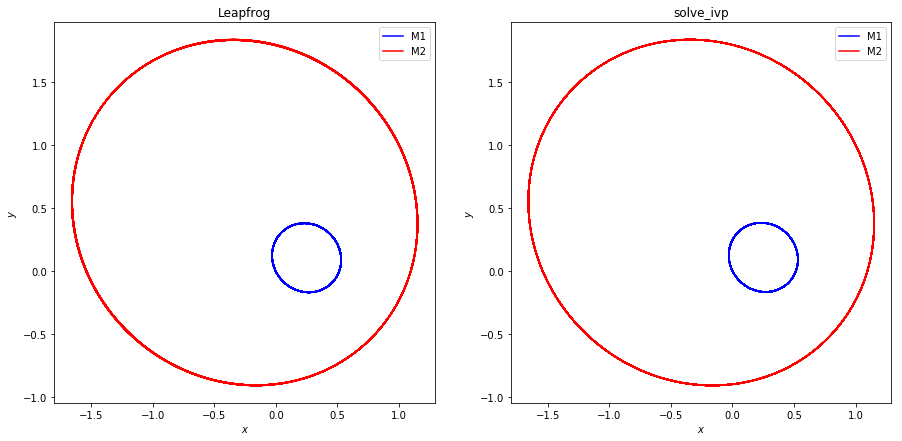

In [7]:
phi_vs_time_labels = (r'$x$', r'$y$')
start, stop = start_stop_indices(t_pts, 0., t_end) 

fig = plt.figure(figsize=(15, 7), num='2 body Orbits')
ax_1 = fig.add_subplot(1,2,1)  
ax_2 = fig.add_subplot(1,2,2)

#plots leapfrog orbit
plot_y_vs_x(Lx1com[start : stop], Ly1com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='M1',
            title = 'Leapfrog',
            ax=ax_1) 
plot_y_vs_x(Lx2com[start : stop], Ly2com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='M2', 
            ax=ax_1) 

#plots solve_ivp orbit
plot_y_vs_x(x1com[start : stop], y1com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='M1',
            title = 'solve_ivp',
            ax=ax_2) 
plot_y_vs_x(x2com[start : stop], y2com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='M2', 
            ax=ax_2) 


This will show that the leapfrog method conserves energy while the solve_ivp function gains energy over time

In [8]:
energyleapfrog = myorbit.energy(t_pts,Lx1,Lx1dot,Ly1,Ly1dot,Lx2,Lx2dot,Ly2,Ly2dot)
eLF_0 = energyleapfrog[0]
eLFrel = np.abs((energyleapfrog-eLF_0)/eLF_0)

energyivp = myorbit.energy(t_pts,x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot)
eIVP_0 = energyivp[0]
eIVPrel = np.abs((energyivp-eIVP_0)/eIVP_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x19bac7c4438>,
 <matplotlib.lines.Line2D at 0x19bad982518>)

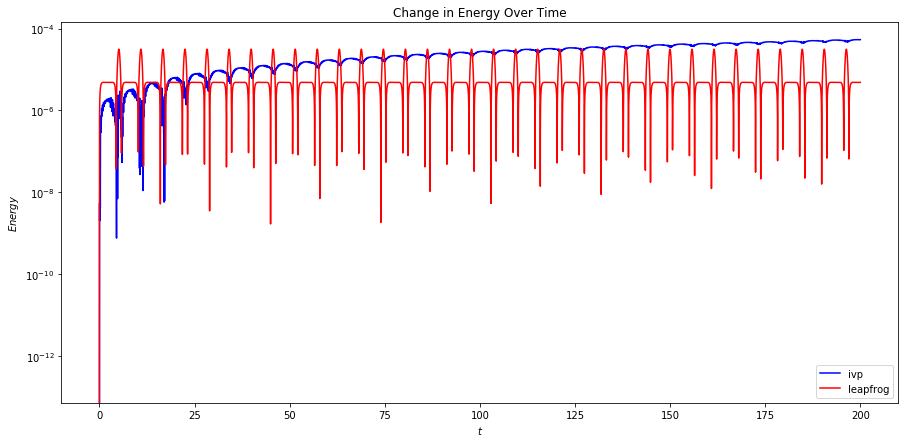

In [9]:
fig = plt.figure(figsize=(15, 7), num='2 body Orbits')
ax_3 =fig.add_subplot(1,1,1) 
E_vs_T_label = (r'$t$', r'$Energy$')
plot_y_vs_x(t_pts[start : stop], eIVPrel[start : stop], 
            axis_labels=E_vs_T_label, 
            color='blue',
            label='ivp',
            title = 'Change in Energy Over Time',
            semilogy=True,
            ax=ax_3) 
plot_y_vs_x(t_pts[start : stop], eLFrel[start : stop], 
            axis_labels=E_vs_T_label, 
            color='red',
            label='leapfrog',
            title = 'Change in Energy Over Time',
            semilogy=True,
            ax=ax_3) 

# 3-Body Orbit



In [67]:
class orbits3():
    def __init__(self,m1,m2,m3,G):
        """
        G = gravitational constant
        m1 = mass of body 1
        m2 = mass of body 2
        m3 = mass of body 3
        
        """
        self.G=G
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        
    def dy_dt(self,t,y):
        """
        
        """
        G=self.G
        m1=self.m1
        m2=self.m2
        m3=self.m3
        x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot,x3,x3dot,y3,y3dot = y
        
        
        x1ddot = -G*m2*(x1-x2)/((x1-x2)**2.+(y1-y2)**2.)**(3./2.)-G*m3*(x1-x3)/((x1-x3)**2.+(y1-y3)**2.)**(3./2.)
        x2ddot = -G*m1*(x2-x1)/((x1-x2)**2.+(y1-y2)**2.)**(3./2.)-G*m3*(x2-x3)/((x2-x3)**2.+(y2-y3)**2.)**(3./2.)
        x3ddot = -G*m1*(x3-x1)/((x1-x3)**2.+(y1-y3)**2.)**(3./2.)-G*m2*(x3-x2)/((x2-x3)**2.+(y2-y3)**2.)**(3./2.)
        y1ddot = -G*m2*(y1-y2)/((x1-x2)**2.+(y1-y2)**2.)**(3./2.)-G*m3*(y1-y3)/((x1-x3)**2.+(y1-y3)**2.)**(3./2.)
        y2ddot = -G*m1*(y2-y1)/((x1-x2)**2.+(y1-y2)**2.)**(3./2.)-G*m3*(y2-y3)/((x2-x3)**2.+(y2-y3)**2.)**(3./2.)
        y3ddot = -G*m1*(y3-y1)/((x1-x3)**2.+(y1-y3)**2.)**(3./2.)-G*m2*(y3-y2)/((x2-x3)**2.+(y2-y3)**2.)**(3./2.)
            

        return x1dot,x1ddot,y1dot,y1ddot,x2dot,x2ddot,y2dot,y2ddot,x3dot,x3ddot,y3dot,y3ddot

                                                                                            
    def solve_ode(self, t_pts, y_0,
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y_0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)

        return solution.y

    
    def solve_ode_Leapfrog(self, t_pts, y_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        x3 = np.zeros(num_t_pts)
        x3dot = np.zeros(num_t_pts)
        x3_dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        y3 = np.zeros(num_t_pts)
        y3dot = np.zeros(num_t_pts)
        y3_dot_half = np.zeros(num_t_pts)
        
        x1[0],x1dot[0],y1[0],y1dot[0],x2[0],x2dot[0],y2[0],y2dot[0],x3[0],x3dot[0],y3[0],y3dot[0] = y_0
        
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            y = [x1[i],x1dot[i],y1[i],y1dot[i],x2[i],x2dot[i],y2[i],y2dot[i],x3[i],x3dot[i],y3[i],y3dot[i]]
            
            x1_dot_half[i] = x1dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2dot[i] + self.dy_dt(t, y)[5] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            x3_dot_half[i] = x3dot[i] + self.dy_dt(t, y)[9] * delta_t/2.
            x3[i+1] = x3[i] + x3_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1dot[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2dot[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            y3_dot_half[i] = y3dot[i] + self.dy_dt(t, y)[11] * delta_t/2.
            y3[i+1] = y3[i] + y3_dot_half[i] * delta_t
            
            
            #update the coords
            y = [x1[i+1],x1dot[i],y1[i+1],y1dot[i],x2[i+1],x2dot[i],y2[i+1],y2dot[i],x3[i+1],x3dot[i],y3[i+1],y3dot[i]]
            
            x1dot[i+1] = x1_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x2dot[i+1] = x2_dot_half[i] + self.dy_dt(t, y)[5] * delta_t/2.
            x3dot[i+1] = x3_dot_half[i] + self.dy_dt(t, y)[9] * delta_t/2.
            y1dot[i+1] = y1_dot_half[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y2dot[i+1] = y2_dot_half[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y3dot[i+1] = y3_dot_half[i] + self.dy_dt(t, y)[11] * delta_t/2.
            
            
            
                
        return x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot,x3,x3dot,y3,y3dot

    def energy(self, t_pts, x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot,x3,x3dot,y3,y3dot):
        """Evaluate the energy as a function of time"""
        m1 = self.m1
        m2 = self.m2
        G = self.G
        energy = (1./2.)*m1*(x1dot**2.+y1dot**2.)+(1./2.)*m2*(x2dot**2.+y2dot**2.)+(1./2.)*m3*(x3dot**2.+y3dot**2.)\
            -G*m1*m2/np.sqrt((x2-x1)**2.+(y2-y1)**2.)-G*m1*m3/np.sqrt((x3-x1)**2.+(y3-y1)**2.)-G*m3*m2/np.sqrt((x2-x3)\
            **2.+(y2-y3)**2.)
            
        return energy
    

In [73]:
#establish inital 3-body parameters and initialize an orbit
m1 = 5.
m2 = 5.
m3 = 5.
G = 2.

myorbit3 = orbits3(m1=m1,m2=m2,m3=m3,G=G)

#create t-pts array
t_start = 0.
t_end = 30.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

#3 body initial conditions
x1_0,y1_0 = 0. ,5.
x1dot_0,y1dot_0 = -1,0

x2_0,y2_0 = -5.*np.sqrt(3.)/2.,-2.5
x2dot_0,y2dot_0 = .5,-np.sqrt(3.)/2.

x3_0,y3_0 = 5.*np.sqrt(3.)/2.,-2.5
x3dot_0,y3dot_0 = .5,np.sqrt(3.)/2.
y_0 = x1_0, x1dot_0, y1_0,y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0, x3_0, x3dot_0, y3_0, y3dot_0

#solve ode for 3-body and leapfrog method
Tx1,Tx1dot,Ty1,Ty1dot,Tx2,Tx2dot,Ty2,Ty2dot,Tx3,Tx3dot,Ty3,Ty3dot = myorbit3.solve_ode(t_pts, y_0)
TLx1,TLx1dot,TLy1,TLy1dot,TLx2,TLx2dot,TLy2,TLy2dot,TLx3,TLx3dot,TLy3,TLy3dot = myorbit3.solve_ode_Leapfrog(t_pts, y_0)

In [74]:
#calculate center of momentum then convert to that frame
TXcm = (m1*Tx1dot+m2*Tx2dot+m3*Tx3dot)/(m1+m2+m3)
TYcm = (m1*Ty1dot+m2*Ty2dot+m3*Ty3dot)/(m1+m2+m3)
Tx1com = Tx1-TXcm*t_pts
Tx2com = Tx2-TXcm*t_pts
Tx3com = Tx3-TXcm*t_pts
Ty2com = Ty2-TYcm*t_pts
Ty1com = Ty1-TYcm*t_pts
Ty3com = Ty3-TYcm*t_pts

#calculate center of momentum and convert for leapfrog method
TLXcm = (m1*TLx1dot+m2*TLx2dot+m3*TLx3dot)/(m1+m2+m3)
TLYcm = (m1*TLy1dot+m2*TLy2dot+m3*TLy3dot)/(m1+m2+m3)
TLx1com = TLx1-TLXcm*t_pts
TLx2com = TLx2-TLXcm*t_pts
TLx3com = TLx3-TLXcm*t_pts
TLy2com = TLy2-TLYcm*t_pts
TLy1com = TLy1-TLYcm*t_pts
TLy3com = TLy3-TLYcm*t_pts


(<matplotlib.axes._subplots.AxesSubplot at 0x19bb7793c50>,
 <matplotlib.lines.Line2D at 0x19bb55a5550>)

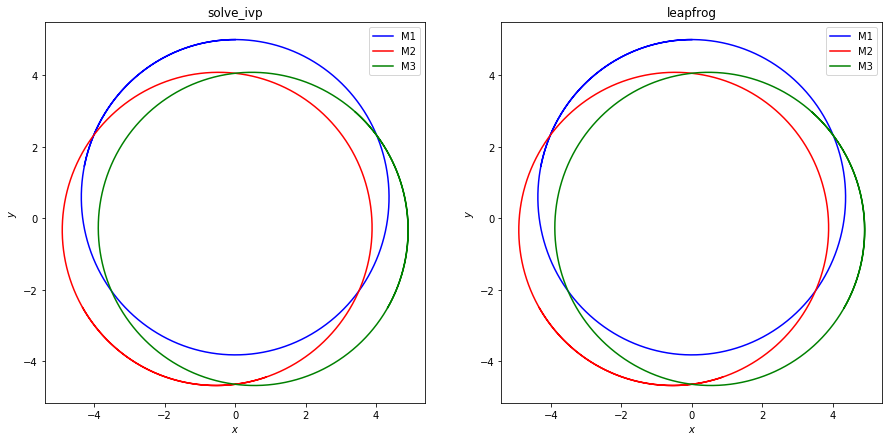

In [75]:
fig = plt.figure(figsize=(15, 7), num='2 body Orbits')
ax_4 = fig.add_subplot(1,2,1)  
ax_5 = fig.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 0., t_end) 

plot_y_vs_x(Tx1com[start : stop], Ty1com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='M1',
            title = 'solve_ivp',
            ax=ax_4) 
plot_y_vs_x(Tx2com[start : stop], Ty2com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='M2', 
            ax=ax_4) 
plot_y_vs_x(Tx3com[start : stop], Ty3com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label='M3', 
            ax=ax_4) 

plot_y_vs_x(TLx1com[start : stop], TLy1com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='M1',
            title = 'leapfrog',
            ax=ax_5) 
plot_y_vs_x(TLx2com[start : stop], TLy2com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='M2', 
            ax=ax_5) 
plot_y_vs_x(TLx3com[start : stop], TLy3com[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label='M3', 
            ax=ax_5) 

In [76]:
Tenergyleapfrog = myorbit3.energy(t_pts,TLx1,TLx1dot,TLy1,TLy1dot,TLx2,TLx2dot,TLy2,TLy2dot,TLx3,TLx3dot,TLy3,TLy3dot)
TeLF_0 = Tenergyleapfrog[0]
TeLFrel = np.abs((Tenergyleapfrog-TeLF_0)/TeLF_0)

Tenergyivp = myorbit3.energy(t_pts,Tx1,Tx1dot,Ty1,Ty1dot,Tx2,Tx2dot,Ty2,Ty2dot,Tx3,Tx3dot,Ty3,Ty3dot)
TeIVP_0 = Tenergyivp[0]
TeIVPrel = np.abs((Tenergyivp-TeIVP_0)/TeIVP_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x19bb6110080>,
 <matplotlib.lines.Line2D at 0x19bb772dda0>)

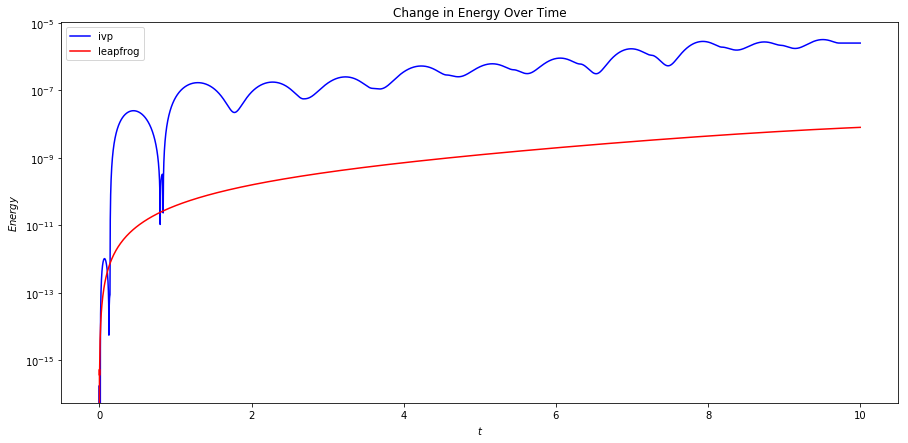

In [72]:
fig = plt.figure(figsize=(15, 7), num='2 body Orbits')
ax_4 =fig.add_subplot(1,1,1) 
E_vs_T_label = (r'$t$', r'$Energy$')
plot_y_vs_x(t_pts[start : stop], TeIVPrel[start : stop], 
            axis_labels=E_vs_T_label, 
            color='blue',
            label='ivp',
            title = 'Change in Energy Over Time',
            semilogy=True,
            ax=ax_4) 
plot_y_vs_x(t_pts[start : stop], TeLFrel[start : stop], 
            axis_labels=E_vs_T_label, 
            color='red',
            label='leapfrog',
            title = 'Change in Energy Over Time',
            semilogy=True,
            ax=ax_4) 